# **Import Statements**

In [1]:
import opensim as osim
import matplotlib.pyplot as plt
import numpy as np
from Bicep import Bicep_Curl
import yaml
import mujoco
import mujoco.viewer
from controller import AdmittanceController
from trajectories import get_trajectory_functions
from main import run
osim.GetVersionAndDate()


%load_ext autoreload
%autoreload 2

# **Model Parameters**

In [2]:
# Load the model.
arm26 = osim.Model('OpenSIM_utils\\Arm26\\arm26.osim')

# Print metadata.
print("Name of the model:", arm26.getName())
print("Author:", arm26.get_credits())
print("Publications:", arm26.get_publications())
print("Length Unit:", arm26.get_length_units())
print("Force Unit:", arm26.get_force_units())
print("Gravity:", arm26.get_gravity())

# Use the TableProcessor to read the motion file.
tableTime = osim.TimeSeriesTable('OpenSIM_utils\\Arm26\\OutputReference\\InverseKinematics\\arm26_InverseKinematics.mot')
print(tableTime.getColumnLabels())

#Named variables
r_shoulder_elev = tableTime.getDependentColumn('r_shoulder_elev').to_numpy()
r_elbow_flex = tableTime.getDependentColumn('r_elbow_flex').to_numpy()
t = tableTime.getIndependentColumn()


Name of the model: arm26
Author: The OpenSim Development Team (Reinbolt, J; Seth, A; Habib, A; Hamner, S) adapted from a model originally created by Kate Holzbaur (11/22/04) License: Creative Commons (CCBY 3.0). You are free to distribute, remix, tweak, and build upon this work, even commercially, as long as you credit us for the original creation. http://creativecommons.org/licenses/by/3.0/
Publications: Holzbaur, K.R.S., Murray, W.M., Delp, S.L. A Model of the Upper Extremity for Simulating Musculoskeletal Surgery and Analyzing Neuromuscular Control. Annals of Biomedical Engineering, vol 33, pp 829–840, 2005
Length Unit: meters
Force Unit: N
Gravity: ~[0,-9.8066,0]
('r_shoulder_elev', 'r_elbow_flex')


# **Example OpenSIM Use**

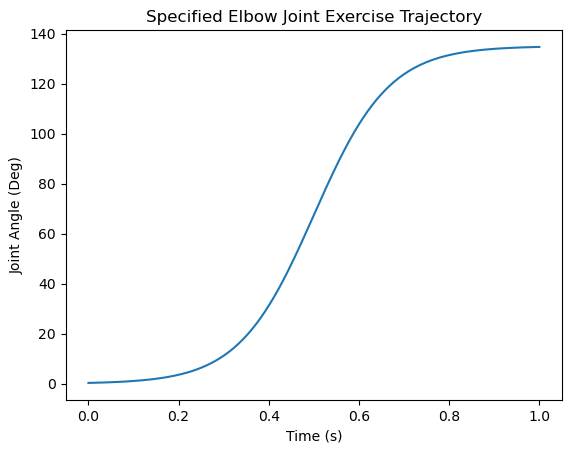

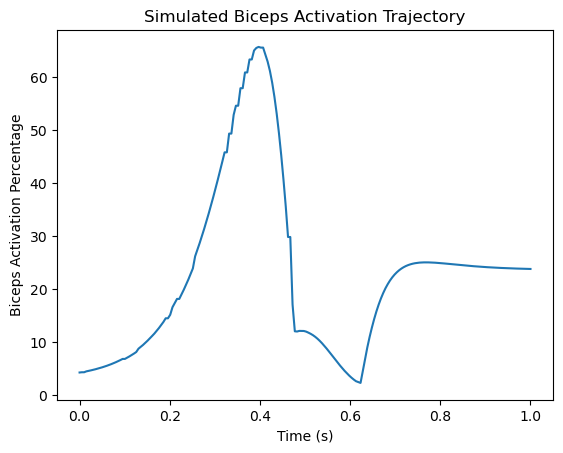

In [3]:
step_per_second = 200
curl_time = 1 #in seconds
bicep = Bicep_Curl(curl_time = curl_time, sps = step_per_second)

# Run Simulation Under zero external force
activation = []
for i in range(int(curl_time*step_per_second)):
    activation.append(bicep.step_simulation(i, [0, -0.0, 0]))


#Plotting
t, elbow_traj = bicep._traj()
plt.plot(t, np.rad2deg(elbow_traj)) 
plt.xlabel("Time (s)")
plt.ylabel("Joint Angle (Deg)")
plt.title("Specified Elbow Joint Exercise Trajectory")
plt.show()

activation = np.asarray(activation)*100
plt.plot(t, activation)
plt.xlabel("Time (s)")
plt.ylabel("Biceps Activation Percentage")
plt.title("Simulated Biceps Activation Trajectory")
plt.show()

# **Combined Simulation**

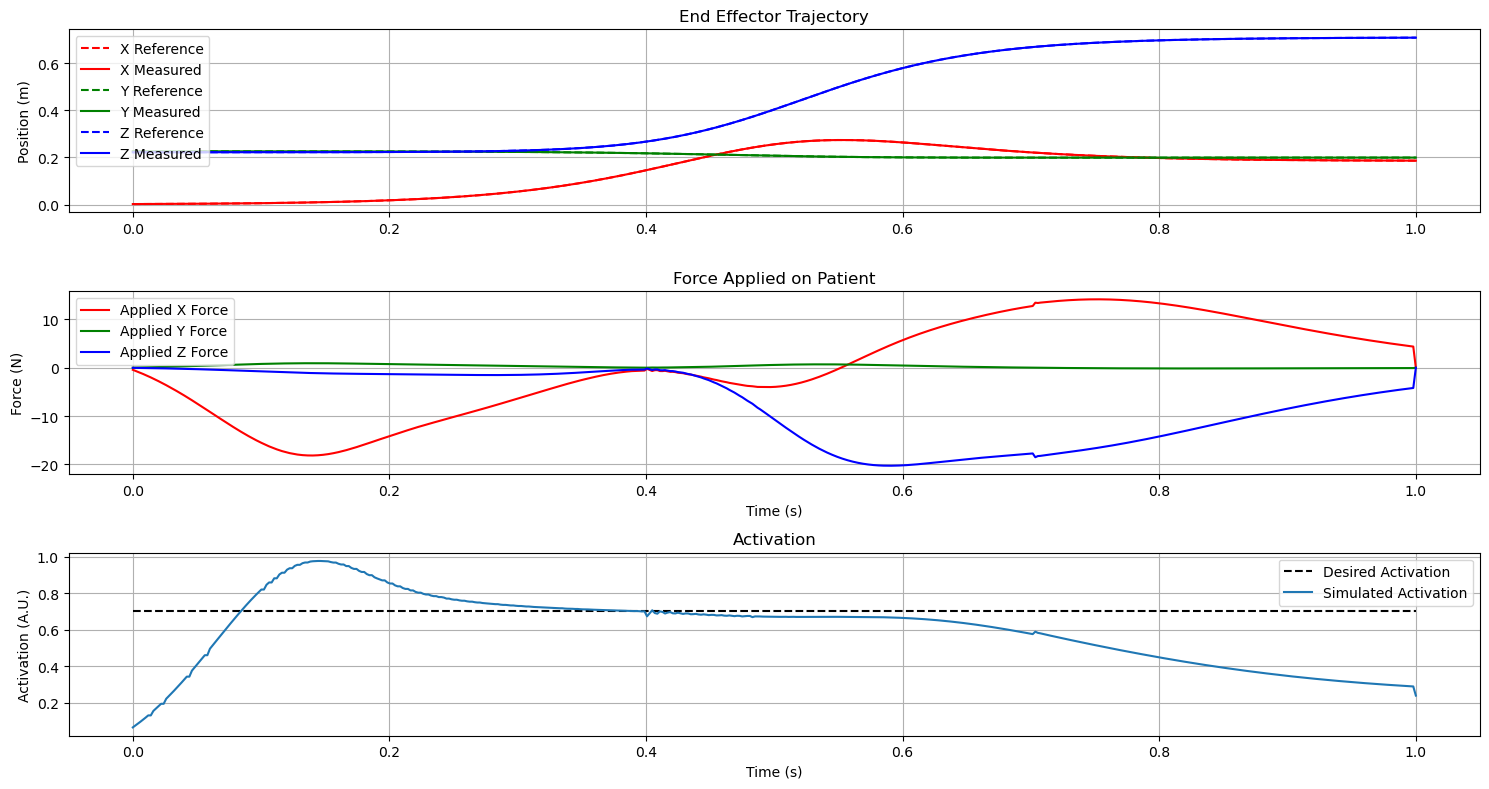

In [5]:
G1 = { 
    'G_p': 100, #1000
    'G_i': 7500, #10000
    'G_d': 5,
    }

G2 = { 
    'G_p': 3000, #3000
    'G_i': 3000, #1000
    'G_d': 5,
    }

G3 = {
    'G_p': 10000, #3000
    'G_i': 3000, #1000
    'G_d': 0,
}

##best params so far: 200, 1000, 1
##best params so far: 500, 1000, 0 also did pretty well
## 750, 1000, 5
## 1500, 2500, 5
## 3000, 2000, 5
## 3000, 1000, 5 / 300

run(curl_time = 1, G1 = G1, G2 = G2, G3 = G3, sps = 500)